In [1]:
import cv2
import requests
from IPython.display import HTML
import cognitive_face as CF
from io import BytesIO
from PIL import Image, ImageDraw
import xlrd

data = xlrd.open_workbook("face_detected.xls")
list = data.sheet_by_index(0)


In [2]:
region = "westcentralus"
subscription_key = "d6ab8eba9c094e9592847e406db1a4fd"
assert subscription_key
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0'


In [3]:
headers = { 'Ocp-Apim-Subscription-Key': 'd6ab8eba9c094e9592847e406db1a4fd' }
headers['Content-Type'] = 'application/octet-stream'

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    #'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}
index = 0;

In [4]:
for i in range(20)
    frame_indx = list.cell(index+1, 0).value
    name = '/home/bkic611/face_detect/raw_img/' + 'ch4_fr%d' % frame_indx + '.png'    
    path_to_file = name #path den file local

    with open(path_to_file, 'rb') as f:
        data = f.read()
    
    response = requests.request('post', "https://{}.api.cognitive.microsoft.com/face/v1.0/detect".format(region), data=data, headers=headers, params=params)

    faces = response.json()

KeyError: 'faceAttributes'

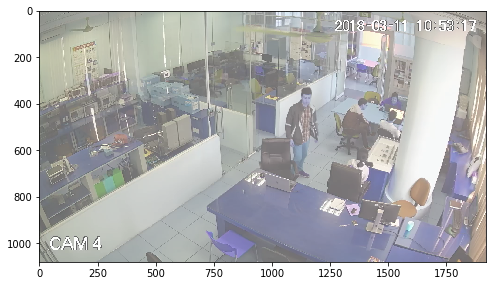

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

image = cv2.imread(path_to_file)

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [6]:
#Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary['faceRectangle']
    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']
    return ((left, top), (bottom, right))

#Download the image from the url
img = Image.open(path_to_file)

#For each face returned use the face rectangle and draw a red box.
draw = ImageDraw.Draw(img)
# cv2.imshow('detected',img)

for face in faces:
    draw.rectangle(getRectangle(face), outline='blue')

#Display the image in the users default image browser.
img.show()
with open('picture_out.png', 'wb') as f:
    f.write(data)